## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) ) 


In [1]:
# link necessary libraries
library(tidyverse)
library(corrplot)

# settings for plot visualisation
options(repr.plot.height = 5, repr.plot.res = 200)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



Načítanie datasetu - dataset viete funkciami dostupnými v R stiahnuť a rozbaliť aj z formátu ZIP

In [2]:
# URL of the dataset
dataset_url <- "https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip"

# create temporary destination file path with .zip extension
dest_file <- tempfile(fileext = ".zip")

# download the dataset, mode = write binary
download.file(dataset_url, destfile = dest_file, mode = "wb")

# unzip the file into chosen location (enter directory)
unzip(dest_file, exdir = "./data")

### Úloha 1 (1b)

Načítajte dataset do premennej `data_hw`.

In [4]:
list.files("./data")
data_hw <- read.csv("./data/heart_failure_clinical_records_dataset.csv")

[1] "boxplot.png"                               
 [2] "env1.png"                                  
 [3] "env2.png"                                  
 [4] "final1.png"                                
 [5] "final2.png"                                
 [6] "final3.png"                                
 [7] "final4.png"                                
 [8] "final5.png"                                
 [9] "final6.png"                                
[10] "final7.png"                                
[11] "git_clone.png"                             
[12] "git_fork1.png"                             
[13] "git_fork2.png"                             
[14] "git_fork3.png"                             
[15] "git_fork4.png"                             
[16] "heart_failure_clinical_records_dataset.csv"
[17] "python1.png"                               
[18] "python2.png"                               
[19] "python3.png"                               
[20] "python4.png"                               
[21] "python5.png"                               
[22] "python6.png"                               
[23] "r_kernel1.png"                             
[24] "r_kernel2.png"                             
[25] "r_kernel3.png"                             
[26] "r_kernel4.png"                             
[27] "r1.png"                                    
[28] "r2.png"                                    
[29] "r3.png"                                    
[30] "r4.png"                                    
[31] "r5.png"                                    
[32] "r6.png"                                    
[33] "r7.png"                                    
[34] "r8.png"

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [5]:
anyNA(data_hw)


[1] FALSE

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [10]:
str(data_hw)

# Age is numerical
# Anamenia is categorical
# Hihg blood pressure is categorical
# Serum_so4 is numerical
# Death event is categorical

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : int  1 1 1 1 1 1 1 1 1 1 ...


**Obsahuje dataset duplicitné záznamy?**

In [6]:
anyDuplicated(data_hw)

[1] 0

### Úloha 2 (1b)

Skúmajte premennú 'sex' (pohlavie). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž) 

In [11]:
data_hw$sex
str(data_hw$sex)

[1] 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1
 [38] 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1
 [75] 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1
[112] 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1
[149] 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
[186] 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1
[223] 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1
[260] 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0
[297] 0 1 1

 int [1:299] 1 1 1 1 0 1 1 1 0 1 ...


**Koľko záznamov mužov a žien obsahuje dataset?**

In [12]:
table(data_hw$sex)


  0   1 
105 194 

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [9]:
table(data_hw$sex, data_hw$smoking)
# 0 is woman, 1 is man
# 0 is non-smoker, 1 is smoker
# woman, non-smoker = 101

   
      0   1
  0 101   4
  1 102  92

### Úloha 3 (1b)

Popíšte premennú 'age' (vek).

In [13]:
summary(data_hw$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   51.00   60.00   60.83   70.00   95.00 

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [14]:
mean(data_hw$age)
min(data_hw$age)
max(data_hw$age)

[1] 60.83389

[1] 40

[1] 95

**Z akého veku je v datasete najviac záznamov?**

In [15]:
age_counts <= table(data_hw$age)
max_age <= names(age_counts)[which.max(age_counts)]
max_age
# 60 is the most common age


[1] "60"

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

- pre vytvorenie premennej použite funkciu ifelse - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/ifelse

In [16]:
data_hw$risk <- ifelse(data_hw$age > 50 & data_hw$serum_creatinine > 1.2, "High", "Low")


Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

- počet stĺpcov (atribút 'breaks') môže mať predvolenú hodnotu, nemusíte ho špecifikovať

- funkcia hist - https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/hist

(hint: použite funkciu filter na záznamy, kde 'risk' == 'High', a v histograme ako dáta vložte hodnoty z premennej 'age')

$x
[1] "Age"

$y
[1] "Count"

$title
[1] "High Risk of Death by Age"

attr(,"class")
[1] "labels"

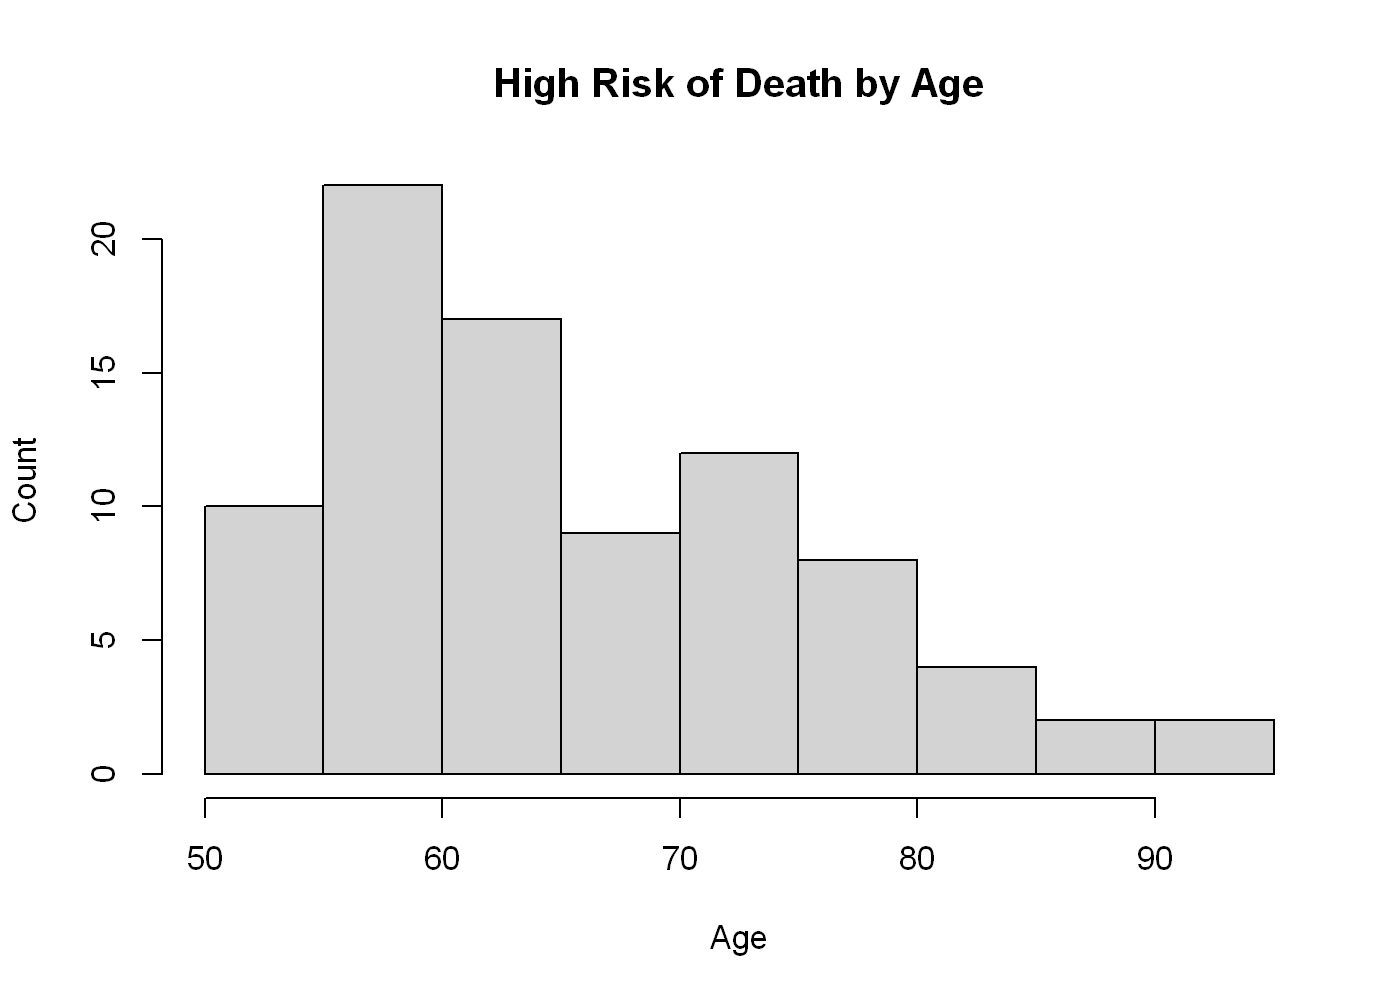

In [21]:


# Create a histogram of age for high risk data
hist(high_risk_data$age, xlab = "Age", ylab = "Count", main = "High Risk of Death by Age")
  labs(x = "Age", y = "Count", title = "High Risk of Death by Age")


**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

- korelácia sa dá analyzovať iba na numerických premenných, preto musíte dátový typ premennej zmeniť na kategorický a ten uložiť vo formáte 'integer' alebo 'numeric'.


Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `risk = .Primitive("as.double")(risk)`.
Caused by warning:
! NAs introduced by coercion"


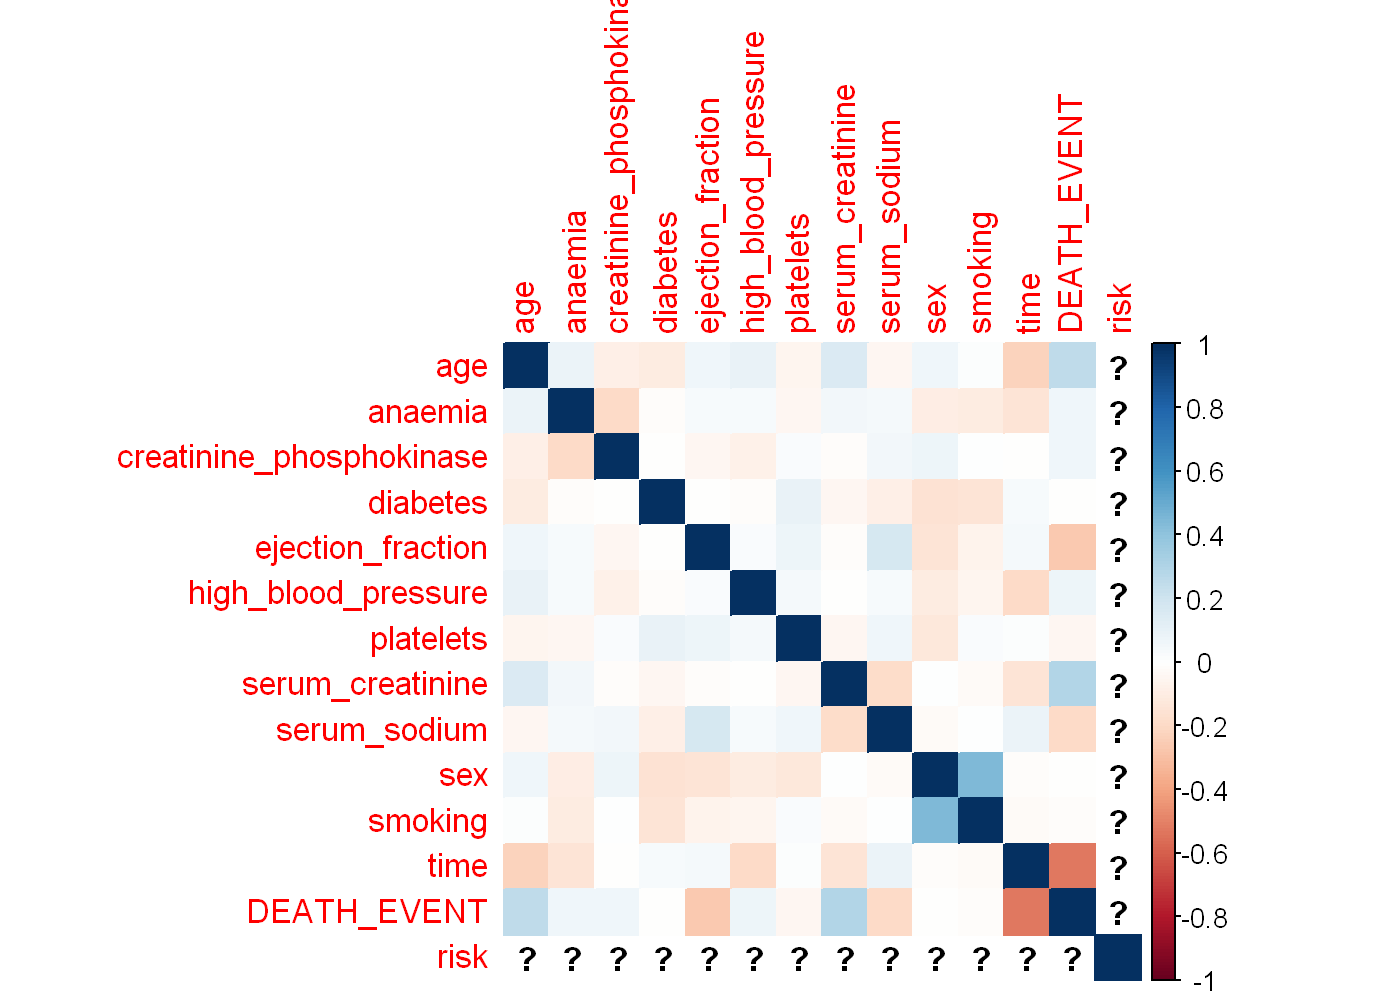

In [22]:
# Convert variables to numeric
data_hw <- data_hw %>%
  mutate_if(is.character, as.numeric)

# Create correlation plot
corrplot(cor(data_hw), method = "color")


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [26]:
correlation_matrix <- cor(data_hw)
negative_correlation <- correlation_matrix[correlation_matrix < 0]

#Death_event and time
cor(data_hw$DEATH_EVENT, data_hw$time)

#Death_evvent and 



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,risk
age,1.00000000,0.08800644,-0.081583900,-0.101012385,0.06009836,0.093288685,-0.05235437,0.159187133,-0.045965841,0.065429524,0.018667868,-0.224068420,0.253728543,NA
anaemia,0.08800644,1.00000000,-0.190741030,-0.012729046,0.03155697,0.038182003,-0.04378555,0.052173604,0.041881610,-0.094768961,-0.107289838,-0.141413982,0.066270098,NA
creatinine_phosphokinase,-0.08158390,-0.19074103,1.000000000,-0.009638514,-0.04407955,-0.070589980,0.02446339,-0.016408480,0.059550156,0.079790629,0.002421235,-0.009345653,0.062728160,NA
diabetes,-0.10101239,-0.01272905,-0.009638514,1.000000000,-0.00485031,-0.012732382,0.09219283,-0.046975315,-0.089550619,-0.157729504,-0.147173413,0.033725509,-0.001942883,NA
ejection_fraction,0.06009836,0.03155697,-0.044079554,-0.004850310,1.00000000,0.024444731,0.07217747,-0.011302475,0.175902282,-0.148385965,-0.067314567,0.041729235,-0.268603312,NA
high_blood_pressure,0.09328868,0.03818200,-0.070589980,-0.012732382,0.02444473,1.000000000,0.04996348,-0.004934525,0.037109470,-0.104614629,-0.055711369,-0.196439479,0.079351058,NA
platelets,-0.05235437,-0.04378555,0.024463389,0.092192828,0.07217747,0.049963481,1.00000000,-0.041198077,0.062124619,-0.125120483,0.028234448,0.010513909,-0.049138868,NA
serum_creatinine,0.15918713,0.05217360,-0.016408480,-0.046975315,-0.01130247,-0.004934525,-0.04119808,1.000000000,-0.189095210,0.006969778,-0.027414135,-0.149315418,0.294277561,NA
serum_sodium,-0.04596584,0.04188161,0.059550156,-0.089550619,0.17590228,0.037109470,0.06212462,-0.189095210,1.000000000,-0.027566123,0.004813195,0.087640000,-0.195203596,NA
sex,0.06542952,-0.09476896,0.079790629,-0.157729504,-0.14838597,-0.104614629,-0.12512048,0.006969778,-0.027566123,1.000000000,0.445891712,-0.015608220,-0.004316376,NA


[1] -0.081583900 -0.101012385 -0.052354367 -0.045965841 -0.224068420
  [6]           NA -0.190741030 -0.012729046 -0.043785550 -0.094768961
 [11] -0.107289838 -0.141413982           NA -0.081583900 -0.190741030
 [16] -0.009638514 -0.044079554 -0.070589980 -0.016408480 -0.009345653
 [21]           NA -0.101012385 -0.012729046 -0.009638514 -0.004850310
 [26] -0.012732382 -0.046975315 -0.089550619 -0.157729504 -0.147173413
 [31] -0.001942883           NA -0.044079554 -0.004850310 -0.011302475
 [36] -0.148385965 -0.067314567 -0.268603312           NA -0.070589980
 [41] -0.012732382 -0.004934525 -0.104614629 -0.055711369 -0.196439479
 [46]           NA -0.052354367 -0.043785550 -0.041198077 -0.125120483
 [51] -0.049138868           NA -0.016408480 -0.046975315 -0.011302475
 [56] -0.004934525 -0.041198077 -0.189095210 -0.027414135 -0.149315418
 [61]           NA -0.045965841 -0.089550619 -0.189095210 -0.027566123
 [66] -0.195203596           NA -0.094768961 -0.157729504 -0.148385965
 [71] -0.104614629 -0.125120483 -0.027566123 -0.015608220 -0.004316376
 [76]           NA -0.107289838 -0.147173413 -0.067314567 -0.055711369
 [81] -0.027414135 -0.022838942 -0.012623153           NA -0.224068420
 [86] -0.141413982 -0.009345653 -0.196439479 -0.149315418 -0.015608220
 [91] -0.022838942 -0.526963779           NA -0.001942883 -0.268603312
 [96] -0.049138868 -0.195203596 -0.004316376 -0.012623153 -0.526963779
[101]           NA           NA           NA           NA           NA
[106]           NA           NA           NA           NA           NA
[111]           NA           NA           NA           NA

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure